In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/processed/Telco_processed.csv")

In [4]:
features = df[["tenure", "MonthlyCharges", "TotalCharges"]]
features.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features.shape

(7043, 3)

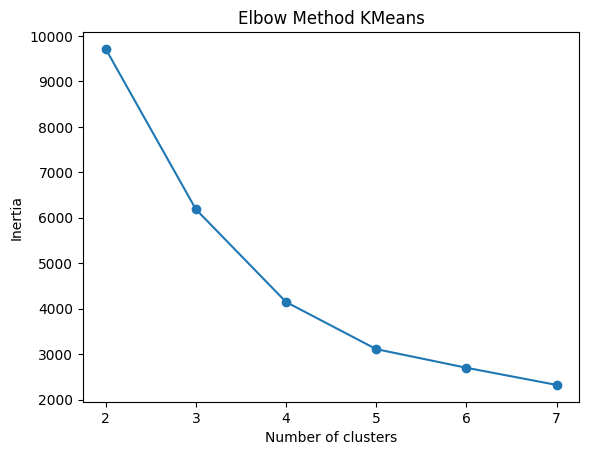

In [ ]:
# Finding the number of clusters

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# The total distance beteen each data points and its cluster center

inertia = [] # How messy are the groups

for k in range(2, 8):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

plt.plot(range(2, 8), inertia, marker="o")
plt.title("Elbow Method KMeans")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Segment"] = kmeans.fit_predict(scaled_features)

In [10]:
df["Segment"].value_counts()

Segment
3    2274
1    1906
2    1703
0    1160
Name: count, dtype: int64

In [ ]:
df.groupby("Segment")[["tenure", "MonthlyCharges", "TotalCharges"]].mean()  

# For each segment, what does the average customer look like?

,tenure,MonthlyCharges,TotalCharges
Segment,,,
0,53.568966,34.907845,1835.615647
1,59.506296,93.306217,5546.421983
2,10.214915,31.775661,302.152378
3,15.406772,80.768646,1249.256266


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

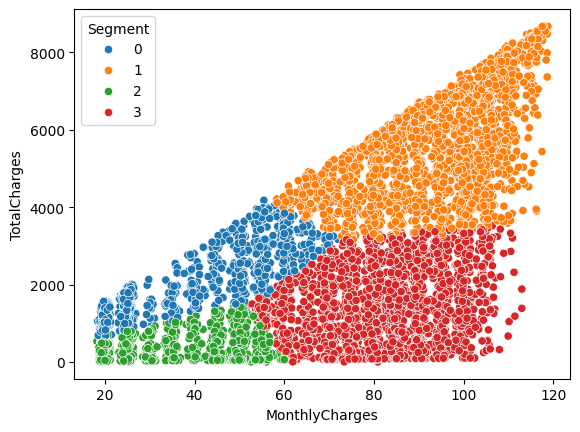

In [12]:
import seaborn as sns

sns.scatterplot(
    data=df,
    x="MonthlyCharges",
    y="TotalCharges",
    hue="Segment",
    palette="tab10"
)